In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_excel(r'C:\Users\Imran\Documents\DATA SCIENCE\Python Basics\imran\End to End Project\creditCardDefaulters\code\Jupyter notebook\default of credit card clients.xls')

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
ProfileReport(df)

In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<AxesSubplot:>

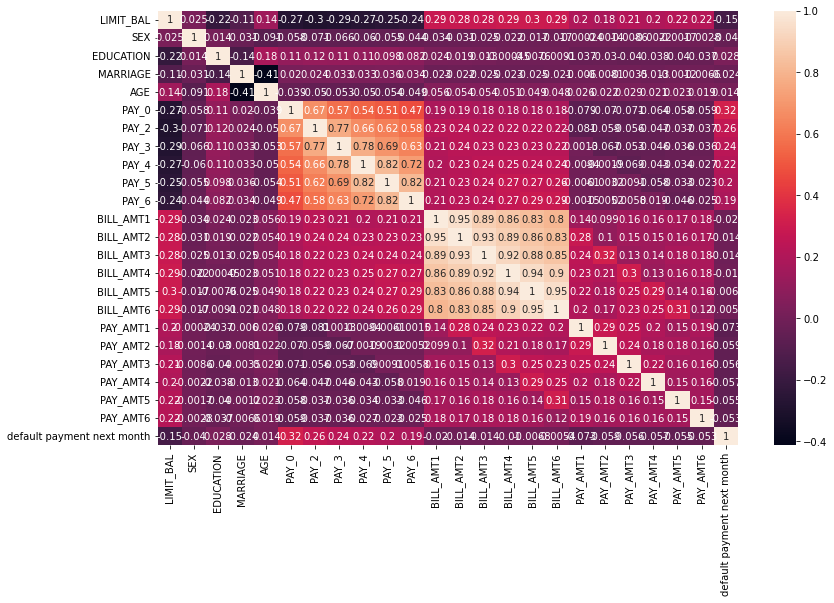

In [8]:
plt.figure(figsize = (13,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
x = df.drop(columns='default payment next month')

In [10]:
y = df['default payment next month']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=144)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std = StandardScaler()

In [14]:
x_train_scaled = std.fit_transform(x_train)

In [15]:
x_test_scaled = std.fit_transform(x_test)

In [16]:
#y_train_scaled = std.fit_transform(y_train)

In [17]:
#y_test_scaled = std.fit_transform(pd.DataFrame(y_test))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics  import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [19]:
rdf = RandomForestClassifier()

In [20]:
model_rdf = rdf.fit(x_train_scaled,y_train)

In [21]:
y_pred = model_rdf.predict(x_test)

In [22]:
cnfm = confusion_matrix(y_test,y_pred)

In [23]:
roc_auc_score(y_test,y_pred)

0.5442890442890443

In [24]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [25]:
model_eval(y_test,y_pred)

{'Accuracy': 0.7786666666666666,
 'Precision': 0.48823529411764705,
 'Recall': 0.12575757575757576,
 'Specficity': 0.9628205128205128,
 'F1': 0.2}

In [26]:
model_gdb = GradientBoostingClassifier()

In [27]:
x_train_scaled.shape

(24000, 23)

In [28]:
x_test_scaled.shape

(6000, 23)

In [29]:
model_gdb.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [30]:
y_pred_gdb = model_gdb.predict(x_test_scaled)

In [31]:
confusion_matrix(y_test,y_pred_gdb)

array([[4416,  264],
       [ 852,  468]], dtype=int64)

In [32]:
roc_auc_score(y_test,y_pred_gdb)

0.649067599067599

In [33]:
model_eval(y_test,y_pred_gdb)

{'Accuracy': 0.814,
 'Precision': 0.639344262295082,
 'Recall': 0.35454545454545455,
 'Specficity': 0.9435897435897436,
 'F1': 0.456140350877193}

In [34]:
gs = GaussianNB()

In [35]:
gs.fit(x_train_scaled,y_train)

GaussianNB()

In [36]:
y_pred_gs=gs.predict(x_test)

In [37]:
model_eval(y_test,y_pred_gs)

C:\Users\Imran\AppData\Local\Temp/ipykernel_22396/263409444.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  precision=tp/(tp+fp)


{'Accuracy': 0.78,
 'Precision': nan,
 'Recall': 0.0,
 'Specficity': 1.0,
 'F1': nan}

In [38]:
roc_auc_score(y_test,y_pred_gs)

0.5

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg = LogisticRegression()

In [41]:
lg.fit(x_train_scaled,y_train)

LogisticRegression()

In [42]:
y_pred_lg = lg.predict(x_test_scaled)

In [43]:
roc_auc_score(y_test,y_pred_lg)

0.6063325563325563

In [44]:
model_eval(y_test,y_pred_lg)

{'Accuracy': 0.808,
 'Precision': 0.6742738589211619,
 'Recall': 0.24621212121212122,
 'Specficity': 0.9664529914529915,
 'F1': 0.36071032186459495}

In [45]:
import xgboost as xgb

In [46]:
model_xgb = xgb.XGBClassifier()

In [47]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
y_pred_xgb = model_xgb.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred_xgb)

array([[4405,  275],
       [ 848,  472]], dtype=int64)

In [50]:
roc_auc_score(y_test,y_pred_xgb)

0.6494075369075369

In [51]:
param_grid_cv = {
    'n_estimators':[5,10,20,100],
    'booster':['gbtree', 'gblinear' , 'dart'],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'max_depth': [3, 4, 5]
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
model_grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(),param_grid=param_grid_cv,n_jobs=-1, cv=4)

In [ ]:
model_grid_xgb.fit(x_train,y_train)

In [ ]:
model_grid_xgb.best_params_

In [ ]:
y_pred_grid_xgb = model_grid_xgb.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_grid_xgb)

In [ ]:
roc_auc_score(y_test,y_pred_grid_xgb)